<a href="https://colab.research.google.com/github/nayan89/Clustering/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Unsupervised_data/hcvdat0.csv")
data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
data.columns

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [ ]:
data.drop(columns="Unnamed: 0", inplace=True)
data.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
data.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


In [ ]:
data.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [ ]:
temp = data.isna().any(axis=1)
temp[temp].index

Int64Index([121, 319, 329, 413, 424, 433, 498, 540, 541, 545, 546, 568, 569,
            570, 571, 576, 581, 582, 583, 584, 585, 590, 592, 603, 613, 614],
           dtype='int64')

In [ ]:
data.iloc[315:331, :]

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
315,0=Blood Donor,76,m,29.2,48.9,25.2,27.2,8.3,4.52,2.79,127.0,18.3,58.1
316,0=Blood Donor,76,m,38.0,97.1,28.6,33.1,14.1,4.83,5.56,90.0,117.6,73.8
317,0=Blood Donor,77,m,52.2,52.2,12.0,23.5,10.9,5.51,4.41,103.0,25.8,67.2
318,0=Blood Donor,32,f,39.9,35.2,22.0,29.8,6.3,8.16,4.37,60.0,4.5,72.5
319,0=Blood Donor,32,f,47.4,52.5,19.1,17.1,4.6,10.19,NaN,63.0,23.0,72.2
320,0=Blood Donor,32,f,41.1,42.8,10.1,14.1,23.2,6.08,3.75,53.0,9.3,68.9
321,0=Blood Donor,32,f,43.5,66.2,9.2,17.8,5.7,7.14,4.38,71.0,44.6,76.1
322,0=Blood Donor,33,f,36.0,77.5,14.8,22.0,4.4,8.61,5.26,66.0,13.1,66.1
323,0=Blood Donor,33,f,36.9,51.7,17.4,22.0,8.3,7.00,5.02,52.0,19.1,72.0
324,0=Blood Donor,33,f,44.3,74.0,49.7,52.3,8.5,6.49,3.34,73.0,44.7,73.8


In [ ]:
data['ALP'].fillna(data['ALP'].mean(), inplace=True)
data['CHOL'].fillna(data['CHOL'].mean(), inplace=True)
data['ALB'].fillna(method='ffill', inplace=True)
data['PROT'].fillna(method='ffill', inplace=True)
data['ALT'].fillna(method='ffill', inplace=True)

In [ ]:
data.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

In [ ]:
data.shape

(615, 13)

In [ ]:
num_data = data.select_dtypes(include=['float64','int64'])
num_data.head()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
#check_norm = stats.skew(num_data)
#print("Skewness:", check_norm)

In [ ]:
corr_matrix = num_data.corr()
corr_matrix

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Age,1.000000,-0.198264,0.168473,-0.021529,0.088666,0.032492,-0.075093,0.123978,-0.022296,0.153087,-0.153561
ALB,-0.198264,1.000000,-0.138835,0.011220,-0.193793,-0.221673,0.376018,0.204769,-0.001405,-0.156441,0.551233
ALP,0.168473,-0.138835,1.000000,0.148026,0.062202,0.048600,0.032971,0.121914,0.149554,0.442262,-0.053627
ALT,-0.021529,0.011220,0.148026,1.000000,0.246455,-0.038651,0.143759,0.071223,-0.040104,0.218003,0.055865
AST,0.088666,-0.193793,0.062202,0.246455,1.000000,0.312231,-0.208536,-0.207507,-0.021387,0.491263,0.038426
BIL,0.032492,-0.221673,0.048600,-0.038651,0.312231,1.000000,-0.333172,-0.156261,0.031224,0.217024,-0.048909
CHE,-0.075093,0.376018,0.032971,0.143759,-0.208536,-0.333172,1.000000,0.420163,-0.011157,-0.110345,0.295028
CHOL,0.123978,0.204769,0.121914,0.071223,-0.207507,-0.156261,0.420163,1.000000,-0.047667,-0.006828,0.206521
CREA,-0.022296,-0.001405,0.149554,-0.040104,-0.021387,0.031224,-0.011157,-0.047667,1.000000,0.121003,-0.032095
GGT,0.153087,-0.156441,0.442262,0.218003,0.491263,0.217024,-0.110345,-0.006828,0.121003,1.000000,-0.012845


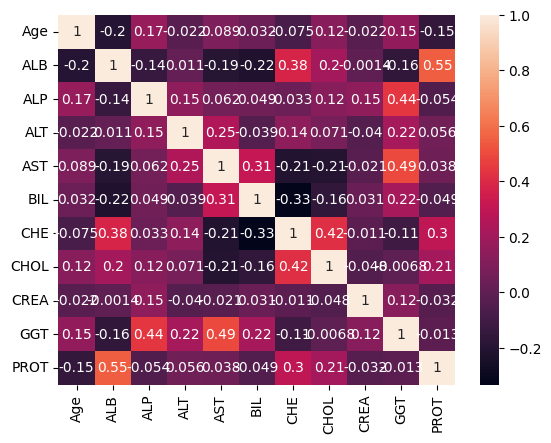

In [ ]:
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
data['Category'].unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [ ]:
data.drop(columns="Sex", inplace=True)
data.head()

,Category,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label = le.fit_transform(data['Category'])


In [ ]:
data["Category"] = label
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
data.drop(columns="Category", axis=1, inplace=True)

data.tail()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
610,62,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,64,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,64,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,46,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0
614,59,36.0,68.28392,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0


# New section

In [ ]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
data_norm = ms.fit_transform(data)

In [ ]:
data_x = pd.DataFrame(data_norm, columns=[data.columns])

In [ ]:
data_x.head()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0.224138,0.350669,0.101653,0.020962,0.036694,0.026461,0.367578,0.218447,0.091495,0.011757,0.535398
1,0.224138,0.350669,0.145571,0.052713,0.044990,0.012243,0.650434,0.408981,0.061619,0.017172,0.701327
2,0.224138,0.475483,0.156427,0.108816,0.134014,0.020932,0.494997,0.457524,0.072822,0.044400,0.763274
3,0.224138,0.420505,0.100419,0.091554,0.038290,0.071485,0.394263,0.401699,0.067221,0.045328,0.683628
4,0.224138,0.361070,0.154947,0.097719,0.045310,0.034755,0.515677,0.350728,0.063486,0.039295,0.528761


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

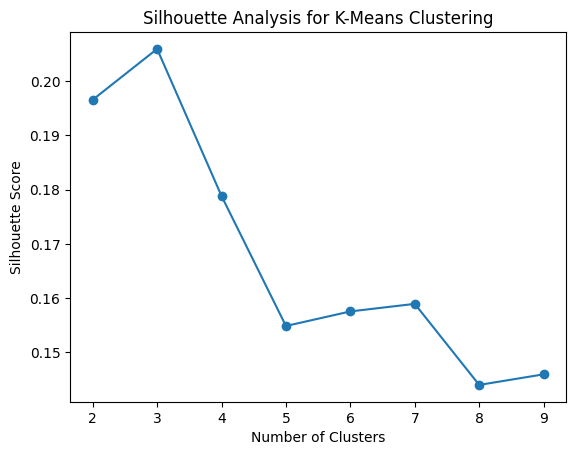

In [ ]:
n_clusters = range(2,10)
silhouette_scores = []
for k in n_clusters:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(data_x)
    silhouette_scores.append(silhouette_score(data_x, km.labels_))

# Create a plot of the silhouette scores against the number of clusters
plt.plot(n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.show()

In [ ]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)

#fit k-means algorithm to data
kmeans.fit(data_x)

#view cluster assignments for each observation
#y = kmeans.labels_

KMeans(n_clusters=3, n_init=10, random_state=1)

In [ ]:
yhat = kmeans.predict(data_x)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
clusters = np.unique(yhat)
clusters

array([0, 1, 2], dtype=int32)

In [ ]:
Y_true = label
Y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_true, yhat)

0.45365853658536587